tgb - 7/10/2019 - Ultimate goal is to make movies with WMI/Potential/Self-aggregation  
Three steps:  
1) Load data and make movies of PW in dam  
2) Study MSE budget and construct potential  
3) Make movie of potential and how it evolves in time

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import datetime
from skimage import measure

# 1) Plot PW field and construct potential

In [2]:
# DAM
beg = '/scratch/b/b380882/'
model = 'dam/'
small = 'RCE_small'
large = 'RCE_large'
dim = '2D/'

In [26]:
# ICON_LEM
# beg = '/scratch/b/b380882/'
# model = 'ICON_LEM_CRM/'
# small = 'RCE_small_'
# large = 'RCE_large_'
# dim = '2D/'

In [19]:
# SAM
# beg = '/scratch/b/b380882/'
# model = 'SAM_CRM/'
# small = 'RCE_small'
# large = 'RCE_large'
# dim = '2D/'

In [3]:
# DAM
PW300 = xr.open_mfdataset(beg+model+large+'300/'+dim+'*prw.nc')
PW295 = xr.open_mfdataset(beg+model+large+'295/'+dim+'*prw.nc')
PW305 = xr.open_mfdataset(beg+model+large+'305/'+dim+'*prw.nc')

PWs300 = xr.open_mfdataset(beg+model+small+'300/'+dim+'*prw.nc')
PWs295 = xr.open_mfdataset(beg+model+small+'295/'+dim+'*prw.nc')
PWs305 = xr.open_mfdataset(beg+model+small+'305/'+dim+'*prw.nc')

/pf/b/b380882/miniconda3/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: In xarray version 0.13 `auto_combine` will be deprecated.
  coords=coords)
/pf/b/b380882/miniconda3/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset` to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in in future, please use the
new `combine_nested` function (or the `combine='nested'` option to
open_mfdataset).The datasets supplied require both concatenation and merging. From
xarray version 0.14 this will operation will require either using the
new `combine_nested` function (or the `combine='nested'` option to
open_mfdataset), with a nested list structure such that you can combine
along the dimensions None. Alternatively if 

In [4]:
# ICON_LEM
# PW300 = xr.open_mfdataset(beg+model+large+'300/'+dim+'ICON_LEM_CRM-'+large+'300'+'-'+dim[:-1]+'.nc')
# PW295 = xr.open_mfdataset(beg+model+large+'295/'+dim+'ICON_LEM_CRM-'+large+'295'+'-'+dim[:-1]+'.nc')
# PW305 = xr.open_mfdataset(beg+model+large+'305/'+dim+'ICON_LEM_CRM-'+large+'305'+'-'+dim[:-1]+'.nc')

# PWs300 = xr.open_mfdataset(beg+model+small+'300/'+dim+'ICON_LEM_CRM-'+small+'300'+'-'+dim[:-1]+'.nc')
# PWs295 = xr.open_mfdataset(beg+model+small+'295/'+dim+'ICON_LEM_CRM-'+small+'295'+'-'+dim[:-1]+'.nc')
# PWs305 = xr.open_mfdataset(beg+model+small+'305/'+dim+'ICON_LEM_CRM-'+small+'305'+'-'+dim[:-1]+'.nc')

In [21]:
# SAM
# PW300 = xr.open_mfdataset(beg+model+large+'300/'+dim+'SAM_CRM_'+large+'300'+'_'+dim[:-1]+'_*prw.nc')
# PW295 = xr.open_mfdataset(beg+model+large+'295/'+dim+'SAM_CRM_'+large+'295'+'_'+dim[:-1]+'_*prw.nc')
# PW305 = xr.open_mfdataset(beg+model+large+'305/'+dim+'SAM_CRM_'+large+'305'+'_'+dim[:-1]+'_*prw.nc')

# PWs300 = xr.open_mfdataset(beg+model+small+'300/'+dim+'SAM_CRM_'+small+'300'+'_'+dim[:-1]+'_*prw.nc')
# PWs295 = xr.open_mfdataset(beg+model+small+'295/'+dim+'SAM_CRM_'+small+'295'+'_'+dim[:-1]+'_*prw.nc')
# PWs305 = xr.open_mfdataset(beg+model+small+'305/'+dim+'SAM_CRM_'+small+'305'+'_'+dim[:-1]+'_*prw.nc')

# 2) Time-evolution of PW and WMI

In [29]:
PW300=PW295

In [30]:
PW300.prw.mean(dim='y').shape

(2400, 2592)

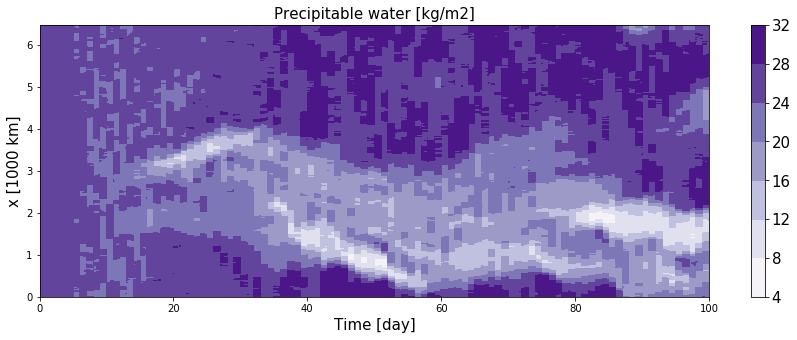

In [31]:
fz = 15

plt.figure(figsize=(15,5))

plt.contourf(PW300.time/(1e9*24*3600),PW300.x/1e6,PW300.prw.mean(dim='y').values.T,cmap='Purples')
plt.xlabel('Time [day]',fontsize=fz)
plt.ylabel('x [1000 km]',fontsize=fz)
plt.title('Precipitable water [kg/m2]',fontsize=fz)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=fz)

In [32]:
def find_separation_bin(field,vmin=45,vmax=55,bins=100):
# Inputs
# field = field from which to take the pdf
# vmin = minimal value of the interval over which min(PDF) will be searched
# vmax = maximal value //
# bins = Number of bins of the PDF

    field_hist,bin_edges = np.histogram(field.flatten(),bins=bins)
    bin_mid = 0.5*(bin_edges[:-1]+bin_edges[1:])

    binary = (bin_mid<vmax)*(bin_mid>vmin)
    imin =  np.argmin(field_hist[binary])+np.argmax(binary)

    return bin_mid[imin],bin_mid

In [41]:
a,bin_m = find_separation_bin(PW300.prw[2000:2400,:,:].values,vmin=10,vmax=28,bins=100)

In [42]:
a

15.742111283308514

In [43]:
field_hist,bin_edges = np.histogram(PW300.prw[2000:2400,:,:].values.flatten(),bins=100)
bin_mid = 0.5*(bin_edges[:-1]+bin_edges[1:])

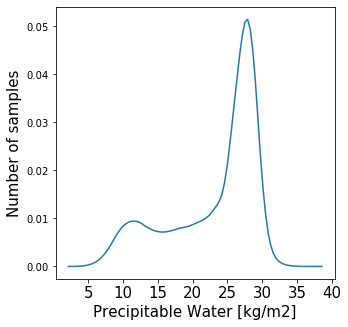

In [49]:
plt.figure(figsize=(5,5))

ax = plt.subplot(111)
ax.plot(bin_mid,field_hist/np.sum(field_hist))
plt.xlabel('Precipitable Water [kg/m2]',fontsize=fz)
plt.ylabel('Number of samples',fontsize=fz)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fz) 

In [5]:
# fz = 25
# it = 1500
# vmin = 0
# vmax = 1

# (f,sub) = plt.subplots(3,2,gridspec_kw={'width_ratios':[1,15],'wspace':0.05,'hspace':0.05})
# f.set_size_inches((20,3))

# for i in range(3):
#     for j in range(2):
    
#         if i==0 and j==0: CRH = PWs295.prw/PWs295.sprw;
#         elif i==0 and j==1: CRH = PW295.prw/PW295.sprw;
#         elif i==1 and j==0: CRH = PWs300.prw/PWs300.sprw;
#         elif i==1 and j==1: CRH = PW300.prw/PW300.sprw;
#         elif i==2 and j==0: CRH = PWs305.prw/PWs305.sprw;
#         elif i==2 and j==1: CRH = PW305.prw/PW305.sprw;

#         sub[i][j].imshow(CRH.values[it,:,:],\
#                          vmin=vmin,vmax=vmax,cmap='Purples')
#         sub[i][j].get_xaxis().set_ticks([])
#         sub[i][j].get_yaxis().set_ticks([])
        
#         plt.subplots_adjust(wspace=0.05, hspace=0.05)
        
#         if j==1: 
#             if i==0: STR = '295K'
#             elif i==1: STR = '300K'
#             elif i==2: STR = '305K'
#             plt.text(-0.041, 0.5,STR,horizontalalignment='center',
#                      verticalalignment='center',
#                      transform=sub[i][j].transAxes,
#                      fontsize = fz)
#             if i==0:
#                 plt.text(0.5,1.2,\
#                          'Time = '+str(PW300.time[it].values/(1e9*24*3600))[:-11]+'days',\
#                          horizontalalignment='center',
#                          verticalalignment='center',
#                          transform=sub[i][j].transAxes,
#                          fontsize = fz)

# plt.savefig('JPG_DATA/it'+str(PW300.time[it].values/(1e9*24*3600))[:-11])
# # # Now adding the colorbar
# # cbar=plt.colorbar(extend="max",location='bottom')

In [56]:
plt.savefig('JPG_DATA/it'+str(PW300.time[it].values/(1e9*24*3600))[:-11])

<Figure size 432x288 with 0 Axes>

In [18]:
dir(sub)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__